In [ ]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [ ]:
#reading the dataset
df=pd.read_csv("copper.csv")
# df.head(4)

In [ ]:
df.shape

(181673, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


Changing the data types where required  

In [ ]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
# df[['quantity tons', 'customer','country','application','thickness','width','product_ref','selling_price']]=df[['quantity tons', 'customer','country','application','thickness','width','product_ref','selling_price']].apply(pd.to_numeric)
# df[['item_date','delivery date']]= df[['item_date','delivery date']].apply(pd.to_datetime)
# df['material_ref'] = df['material_ref'].str.lstrip('0')  #Remove leading characters in Series/Index.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [ ]:
df["quantity_tons"]=df["quantity tons"]
df=df.drop("quantity tons", axis="columns")
df["item_type"]=df["item type"]
df=df.drop("item type", axis="columns")
df["delivery_date"]=df["delivery date"]
df=df.drop("delivery date", axis="columns")
df.columns

Index(['id', 'item_date', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'material_ref', 'product_ref', 'selling_price',
       'quantity_tons', 'item_type', 'delivery_date'],
      dtype='object')

In [ ]:
# df.dtypes

In [ ]:
df.head(4)

,id,item_date,customer,country,status,application,thickness,width,material_ref,product_ref,selling_price,quantity_tons,item_type,delivery_date
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,30156308.0,28.0,Won,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,54.151139,W,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,30202938.0,25.0,Won,41.0,0.80,1210.0,104991,1668701718,1047.00,768.024839,W,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,30153963.0,30.0,Won,28.0,0.38,952.0,S0380700,628377,644.33,386.127949,WI,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,30349574.0,32.0,Won,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,202.411065,S,2021-01-01


In [ ]:
df.describe()

,customer,country,application,thickness,width,product_ref,selling_price,quantity_tons
count,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03,5.874926e+03
std,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05,2.349081e+06
min,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03,-2.000000e+03
25%,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02,1.097030e+01
50%,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,3.036464e+01
75%,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,6.716061e+01
max,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08,1.000000e+09


DATA CLEANING

In [ ]:
df.isnull().sum()

id                   2
item_date            3
customer             1
country             28
status               2
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
selling_price        1
quantity_tons        1
item_type            0
delivery_date        3
dtype: int64

In [ ]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data.
df['material_ref'].fillna('unknown', inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df.shape
# df.id.unique()

(181631, 14)

In [ ]:
# df.id.value_counts()

In [ ]:
df.id.nunique()

181631

In [ ]:
df.isnull().sum()

id               0
item_date        0
customer         0
country          0
status           0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    0
quantity_tons    0
item_type        0
delivery_date    0
dtype: int64

In [ ]:
# Dropping id column
df=df.drop("id", axis="columns")

In [ ]:
df.columns

Index(['item_date', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'material_ref', 'product_ref', 'selling_price',
       'quantity_tons', 'item_type', 'delivery_date'],
      dtype='object')

In [ ]:
print("item date: ",df.item_date.nunique(),
      "\ncountry: ",df.country.nunique(),
      "\nstatus: ",df.status.nunique(),
      "\napplication: ",df.application.nunique(),
      "\nthickness: ",df.thickness.nunique(),
      "\nwidth: ",df.width.nunique(),
      "\nmaterial_ref: ",df.material_ref.nunique(),
      "\nproduct_ref: ",df.product_ref.nunique(),
      "\nselling_price: ",df.selling_price.nunique(),
      "\nitem_type: ",df.item_type.nunique(),
      "\ndelivery_date: ",df.delivery_date.nunique(),
      "\nquantity_tons: ",df.quantity_tons.nunique())

item date:  250 
country:  17 
status:  9 
application:  30 
thickness:  594 
width:  1386 
material_ref:  16563 
product_ref:  33 
selling_price:  9795 
item_type:  7 
delivery_date:  26 
quantity_tons:  181631


In [ ]:
df.quantity_tons.describe()

count    1.816310e+05
mean     5.876231e+03
std      2.349346e+06
min     -2.000000e+03
25%      1.096801e+01
50%      3.036395e+01
75%      6.716187e+01
max      1.000000e+09
Name: quantity_tons, dtype: float64

In [ ]:
# removing outliers
iqr=df.quantity_tons.quantile(0.75)-df.quantity_tons.quantile(0.25)
iqr
upper=df.quantity_tons.quantile(0.75)+(1.5*iqr)
lower=df.quantity_tons.quantile(0.75)-(1.5*iqr)
print(upper,lower)

print("above :",sum(df.quantity_tons>upper))
print("below :",sum(df.quantity_tons<lower))

151.45265056999997 -17.128912509999992
above : 20949
below : 2


In [ ]:
df.quantity_tons=df.quantity_tons.clip(0,upper)
df.quantity_tons.describe()

count    181631.000000
mean         49.175988
std          47.996649
min           0.000000
25%          10.968015
50%          30.363953
75%          67.161869
max         151.452651
Name: quantity_tons, dtype: float64

In [ ]:
df.customer.nunique()

1167

In [ ]:
# df.customer.describe()

count    1.816310e+05
mean     3.023251e+07
std      1.005626e+05
min      1.245800e+04
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      3.040818e+07
Name: customer, dtype: float64

In [ ]:
# # removing outliers
# iqr=df.customer.quantile(0.75)-df.customer.quantile(0.25)
# iqr
# upper=df.customer.quantile(0.75)+(1.5*iqr)
# lower=df.customer.quantile(0.75)-(1.5*iqr)
# print(upper,lower)

# print("above :",sum(df.customer>upper))
# print("below :",sum(df.customer<lower))

30405714.0 30155118.0
above : 1606
below : 9554


In [ ]:
# df.customer=df.customer.clip(lower,upper)
# df.customer.describe()

count    1.816310e+05
mean     3.023287e+07
std      7.104906e+04
min      3.015512e+07
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      3.040571e+07
Name: customer, dtype: float64

In [ ]:
df.country.nunique()

17

In [ ]:
df.country.unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [ ]:
# df.country.value_counts()

In [ ]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
df.status.value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [ ]:
df.item_type.unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
df.item_type.value_counts()

W         105607
S          69202
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item_type, dtype: int64

In [ ]:
df1=df.copy()

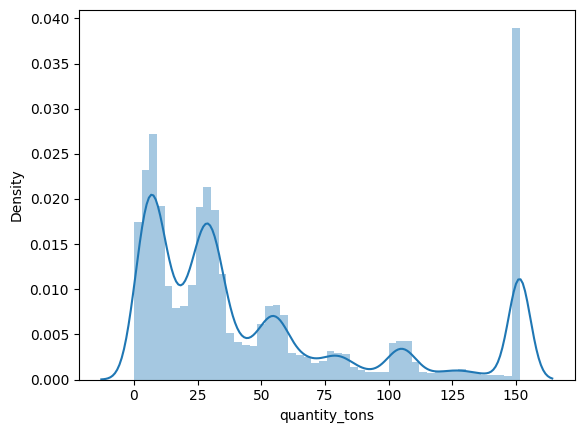

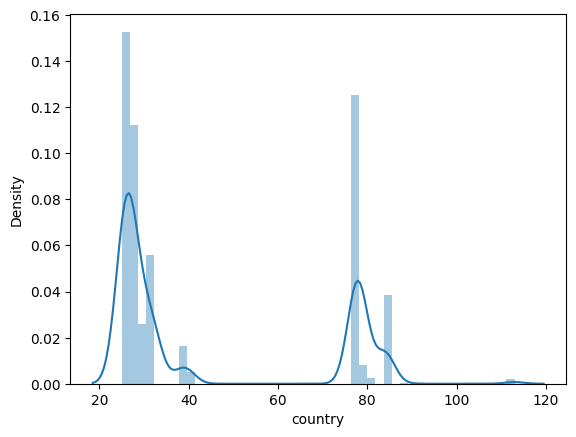

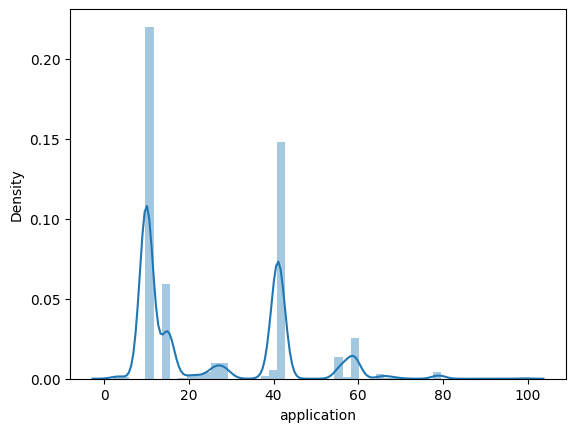

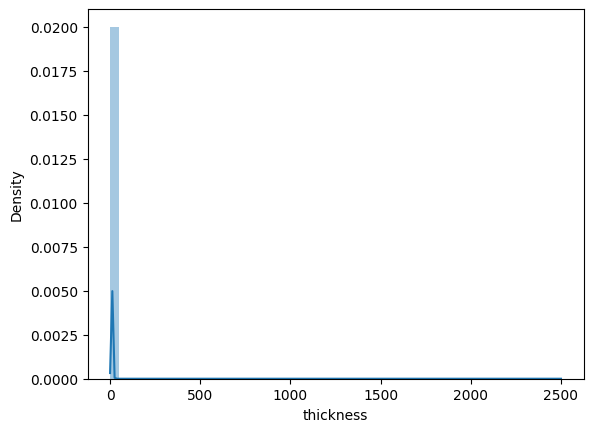

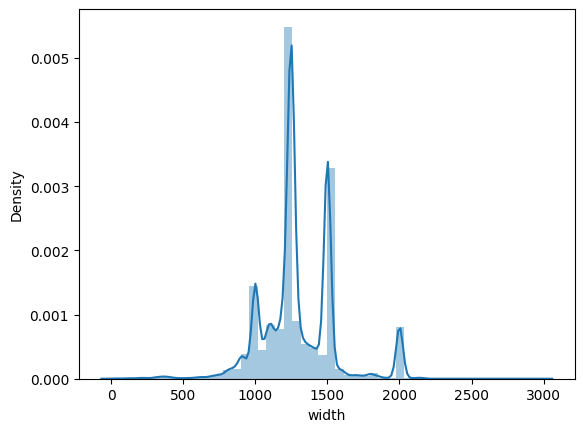

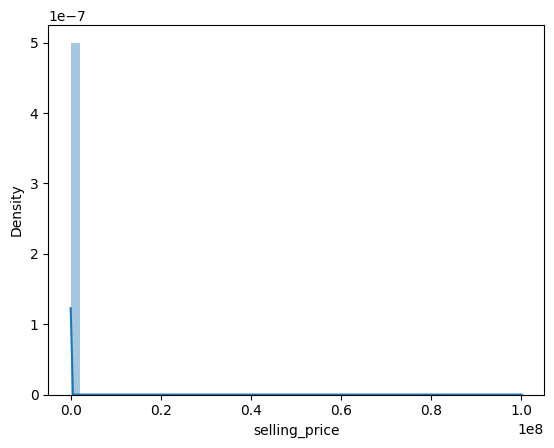

In [ ]:
sns.distplot(df1['quantity_tons'])
plt.show()
sns.distplot(df1['country'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['width'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()

In [ ]:
mask1 = df1['selling_price'] <= 0
print(mask1.sum())
df1.loc[mask1, 'selling_price'] = np.nan

mask1 = df1['quantity_tons'] <= 0
print(mask1.sum())
df1.loc[mask1, 'quantity_tons'] = np.nan

mask1 = df1['thickness'] <= 0
print(mask1.sum())

7
4
0


In [ ]:
# sns.distplot(df1['selling_price'])
# plt.show()
# sns.distplot(df1['quantity_tons'])
# plt.show()

In [ ]:
df1.isnull().sum()

item_date        0
customer         0
country          0
status           0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    7
quantity_tons    4
item_type        0
delivery_date    0
dtype: int64

In [ ]:
df1.dropna(inplace=True)
len(df1)

181620

Text(0.5, 1.0, 'quantity_tons')

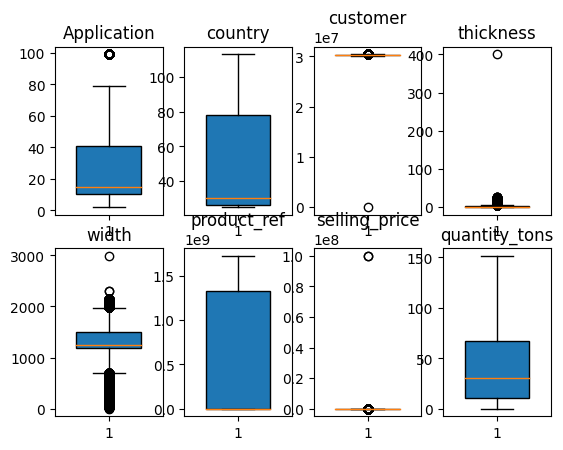

In [ ]:
plt.subplot(2,4,1)
plt.boxplot(x=df1['application'], patch_artist=True, widths = 0.6)
plt.title("Application")

plt.subplot(2,4,2)
plt.boxplot(x=df1['country'], patch_artist=True, widths = 0.6)
plt.title("country")

plt.subplot(2,4,3)
plt.boxplot(x=df1['customer'], patch_artist=True, widths = 0.6)
plt.title("customer")

plt.subplot(2,4,4)
plt.boxplot(x=df1['thickness'], patch_artist=True, widths = 0.6)
plt.title("thickness")

plt.subplot(2,4,5)
plt.boxplot(x=df1['width'], patch_artist=True, widths = 0.6)
plt.title("width")

plt.subplot(2,4,6)
plt.boxplot(x=df1['product_ref'], patch_artist=True, widths = 0.6)
plt.title("product_ref")

plt.subplot(2,4,7)
plt.boxplot(x=df1['selling_price'], patch_artist=True, widths = 0.6)
plt.title("selling_price")

plt.subplot(2,4,8)
plt.boxplot(x=df1['quantity_tons'], patch_artist=True, widths = 0.6)
plt.title("quantity_tons")

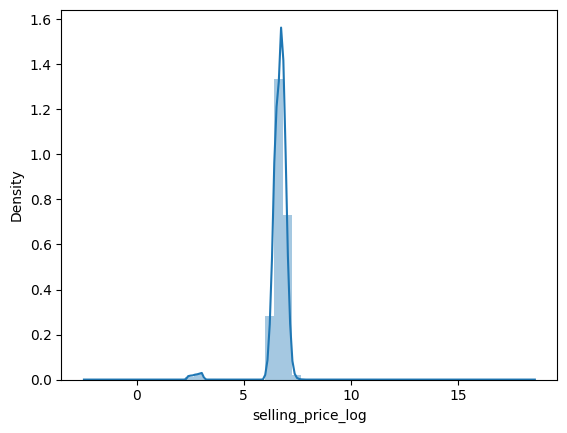

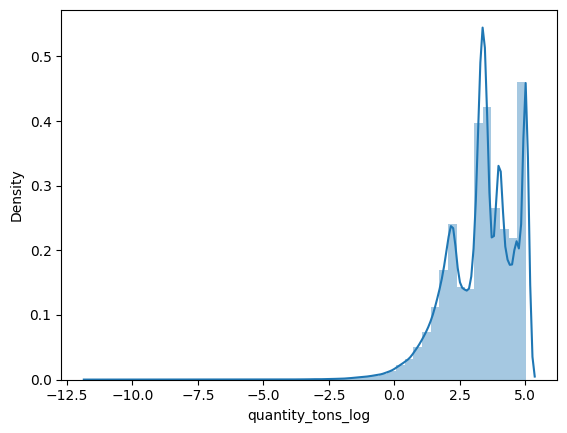

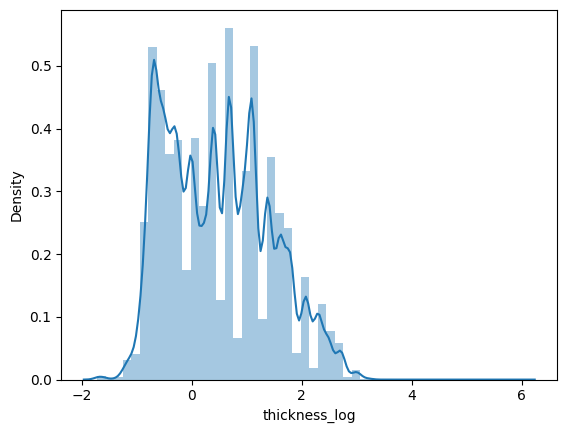

In [ ]:
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()

df1['quantity_tons_log'] = np.log(df1['quantity_tons'])
sns.distplot(df1['quantity_tons_log'])
plt.show()

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [ ]:
df1.head(3)

,item_date,customer,country,status,application,thickness,width,material_ref,product_ref,selling_price,quantity_tons,item_type,delivery_date,selling_price_log,quantity_tons_log,thickness_log
0,2021-04-01,30156308.0,28.0,Won,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,54.151139,W,2021-07-01,6.749931,3.991779,0.693147
1,2021-04-01,30202938.0,25.0,Won,41.0,0.80,1210.0,104991,1668701718,1047.00,151.452651,W,2021-04-01,6.953684,5.020273,-0.223144
2,2021-04-01,30153963.0,30.0,Won,28.0,0.38,952.0,S0380700,628377,644.33,151.452651,WI,2021-01-01,6.468211,5.020273,-0.967584


In [ ]:
x=df1[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

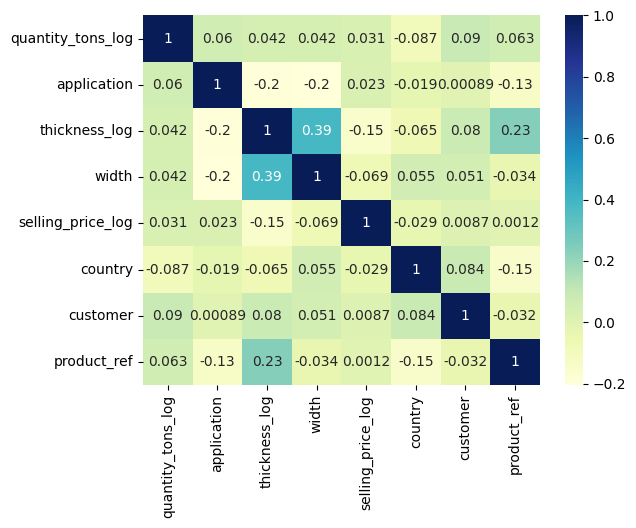

In [ ]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [ ]:
X=df1[['quantity_tons_log','status','item_type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.02300115405782535
R-squared: 0.9286057622052111


In [ ]:
# X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
# y=d

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [699.6553233]


In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
print(len(df1))

181620


In [ ]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

DECISION TREE CLASSIFIER


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df2['status']
X= df2[['quantity_tons_log','selling_price_log','item_type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item_type']])
X_ohe = ohe.fit_transform(X[['item_type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9103902147178089
Confusion Matrix:
[[ 5657  1345]
 [ 1351 21733]]


Confusion Matrix:
[[ 5657  1345]
 [ 1351 21733]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.87      0.87      0.87     30086
weighted avg       0.91      0.91      0.91     30086



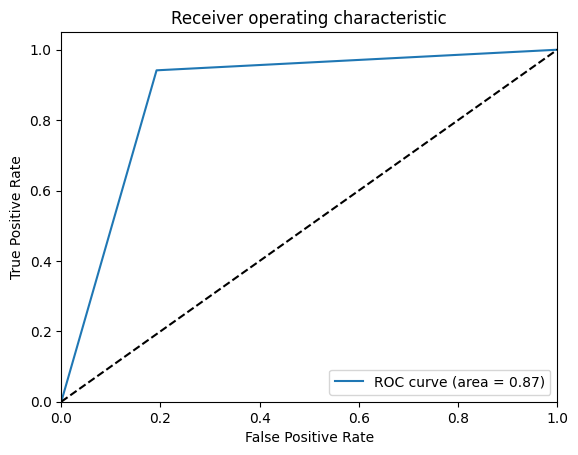

In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [ ]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)